In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_csv('./dataset/trainingset.csv', header=None)
fruits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,TR42,59,JobCat11,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,TR44,41,JobCat9,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
2,TR62,55,JobCat7,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,TR205,56,JobCat6,married,tertiary,no,830,yes,yes,unknown,6,may,1,-1,0,unknown,yes
4,TR206,60,JobCat2,divorced,secondary,no,545,yes,no,unknown,6,may,1,-1,0,unknown,yes


In [7]:
print(fruits[16].unique())

['yes' 'no']


In [8]:
print(fruits.groupby([16]).size())

16
no     21488
yes     2812
dtype: int64


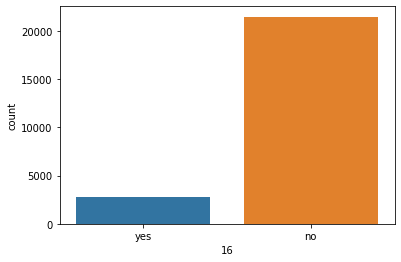

In [9]:
import seaborn as sns
sns.countplot(fruits[16],label="Count")
plt.show()

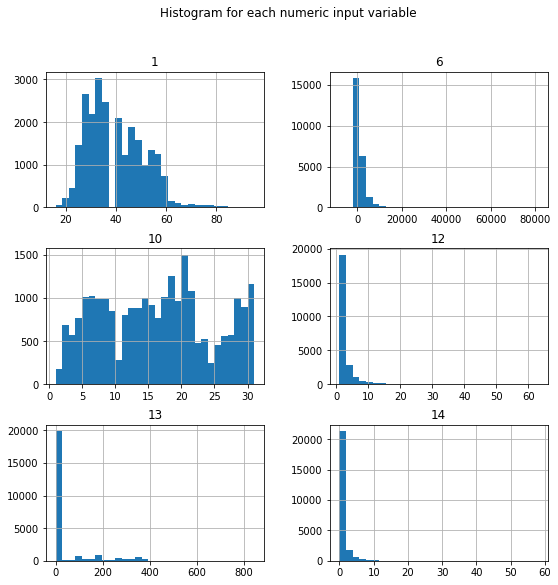

In [10]:
import pylab as pl
fruits.drop([16] ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
24295     no
24296     no
24297     no
24298     no
24299     no
Name: 16, Length: 24300, dtype: object.

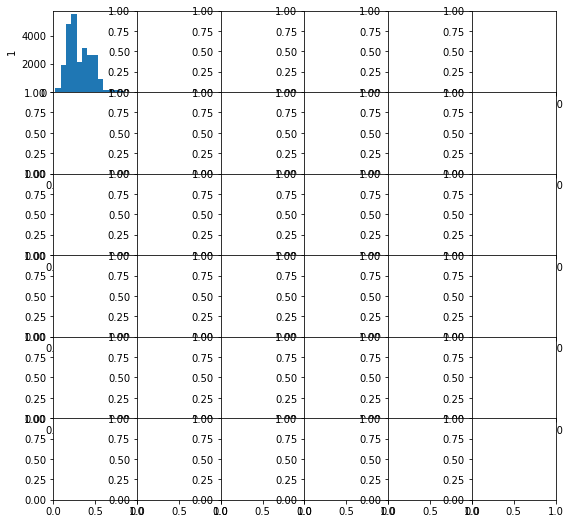

In [11]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = [1,6,10,12,13,14]
X = fruits[feature_names]
y = fruits[16]
cmap = cm.get_cmap('gnuplot')
scatter = pd.pandas.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#决策树算法（decision tree）
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


In [18]:
#Knn算法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.87


In [19]:
#线性判别分析（LDA）

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.88
Accuracy of LDA classifier on test set: 0.87


In [20]:
#朴素贝叶斯算法（Naive Bayes）

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
    .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
    .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.84


Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.88


Automatically created module for IPython interactive environment


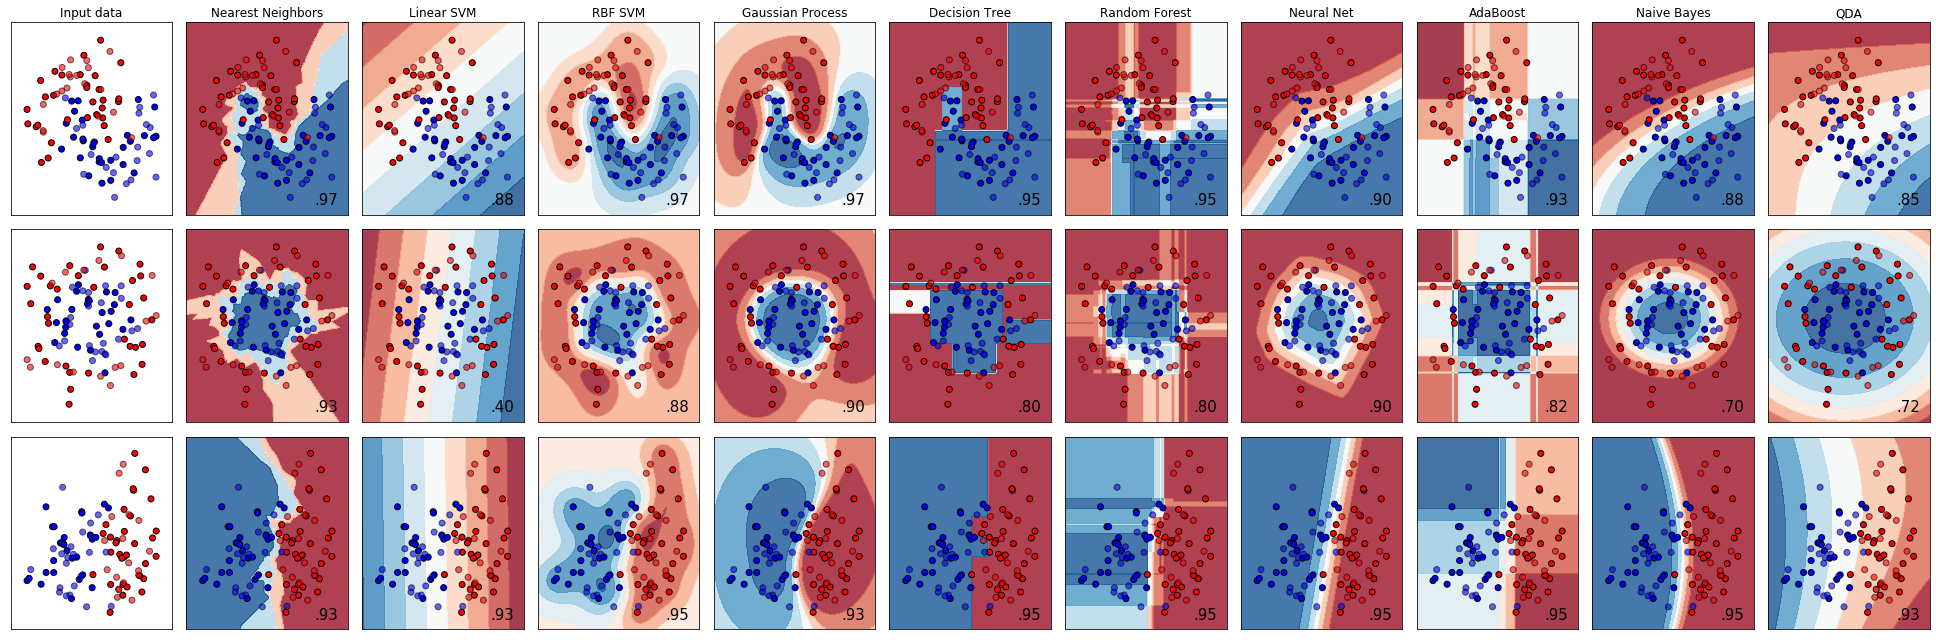

Automatically created module for IPython interactive environment


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 15794     no
9669      no
23903     no
299      yes
1107     yes
        ... 
21575     no
5390      no
860      yes
15795     no
23654     no
Name: 16, Length: 14580, dtype: object.

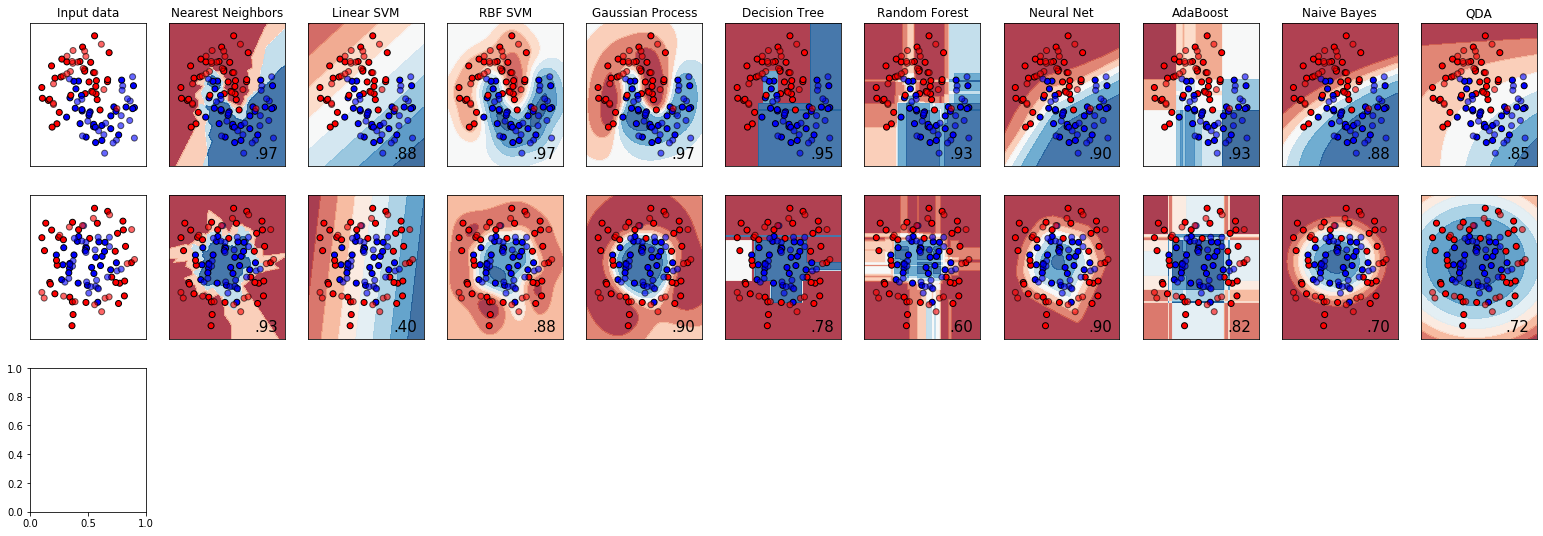

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.88


Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.87


Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.88


Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.88


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5309   20]
 [ 741    5]]
              precision    recall  f1-score   support

          no       0.88      1.00      0.93      5329
         yes       0.20      0.01      0.01       746

    accuracy                           0.87      6075
   macro avg       0.54      0.50      0.47      6075
weighted avg       0.79      0.87      0.82      6075

